In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
results = pd.read_csv("metrics.csv")
results.set_index(["algo", "no"])

,,dm,cm,entropy,acc
algo,no,,,,
datafly,1,0.466667,0.555379,0.706496,0.351852
mondrian,1,0.800000,0.446211,0.447258,0.486772
datafly,2,0.466667,0.531532,0.681409,0.320106
mondrian,2,0.833333,0.475888,0.493873,0.428571
datafly,3,0.400000,0.552729,0.727920,0.436508
...,...,...,...,...,...
mondrian,198,0.833333,0.420774,0.485048,0.383598
datafly,199,0.466667,0.563328,0.720435,0.359788
mondrian,199,0.766667,0.438262,0.404751,0.343915


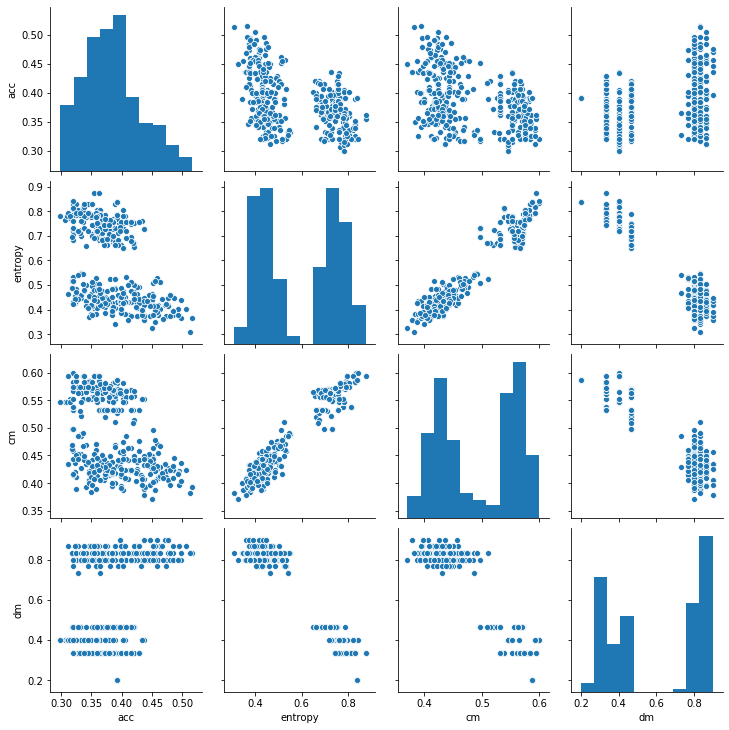

In [10]:
sb.pairplot(results[["acc", "entropy", "cm", "dm"]])

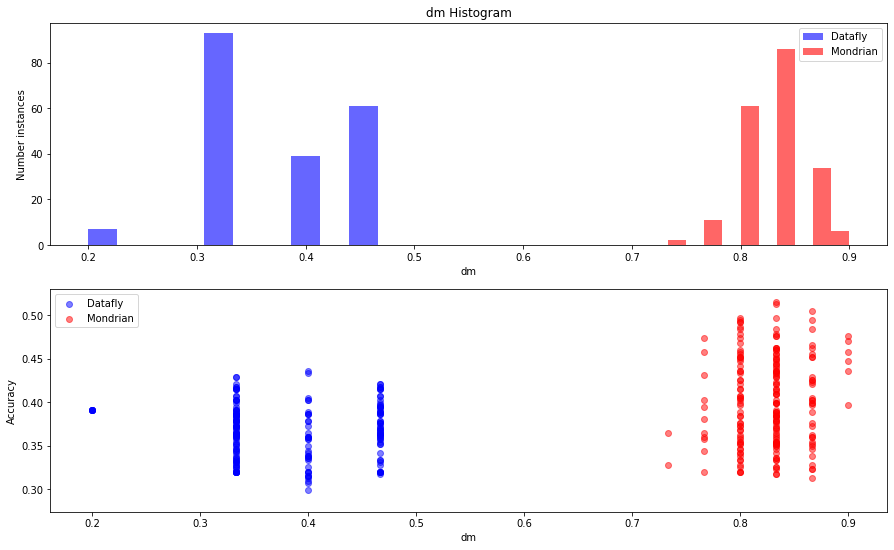

In [58]:
def plot_metric(metric):    
    fig, (ax1, ax2)= plt.subplots(2,1, figsize=(15,9))
    dataflys = results[results["algo"] == "datafly"]
    mondrians = results[results["algo"] == "mondrian"]
    
    ax1.hist(dataflys[metric], label="Datafly", color="b", alpha=.6)
    ax1.hist(mondrians[metric], label="Mondrian", color="r", alpha=.6)
    ax1.set_xlabel(metric)
    ax1.set_ylabel("Number instances")
    ax1.legend()
    ax1.set_title(f"{metric} Histogram")
    
    ax2.scatter(dataflys[metric], dataflys["acc"], c="b", alpha=0.5, label="Datafly")
    ax2.scatter(mondrians[metric], mondrians["acc"], c="r", alpha=0.5, label="Mondrian")
    ax2.set_xlabel(metric)
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
plot_metric("dm")

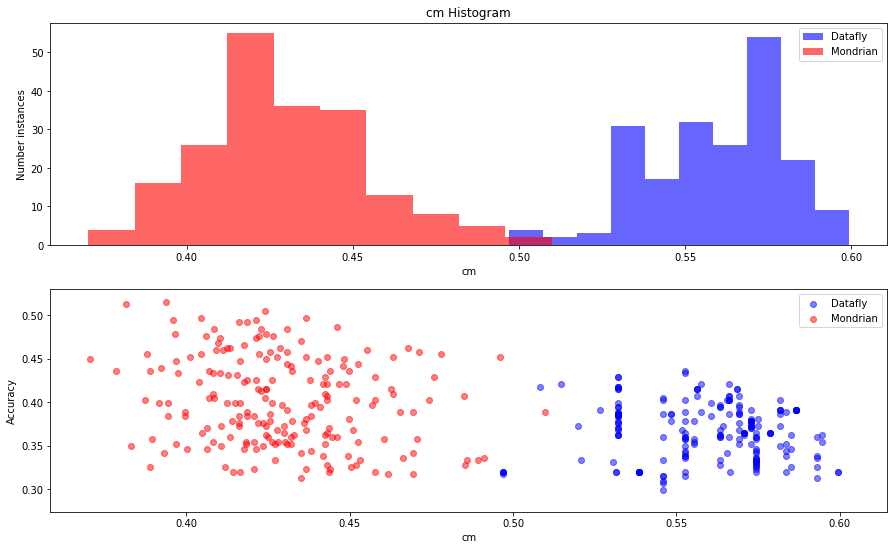

In [59]:
plot_metric("cm")

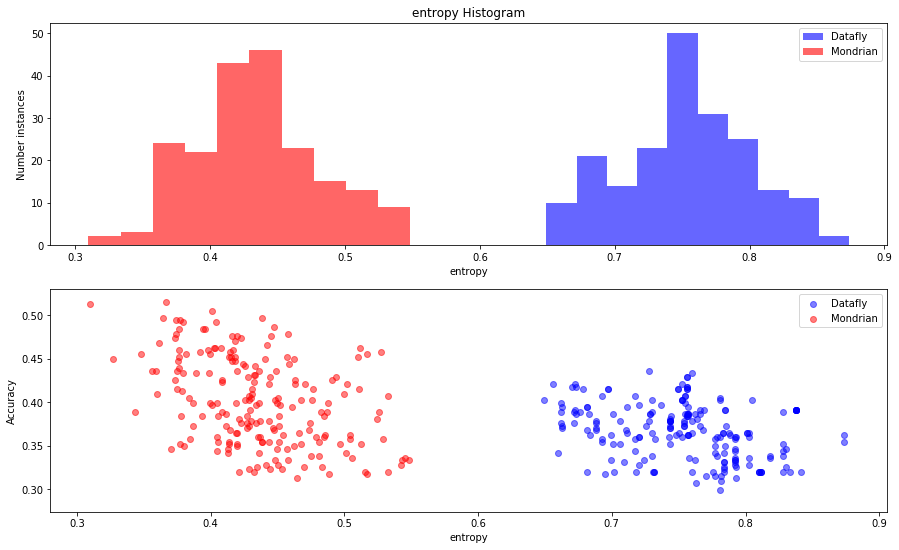

In [60]:
plot_metric("entropy")

# Predicting Power

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regress(regressors):
    X = results[regressors]
    y = results["acc"]

    reg = LinearRegression()
    reg.fit(X, y)
    print(f"R2 Score: {reg.score(X,y)}")
    print(f"Coeffs: {reg.coef_}")
    print(f"Intercept: {reg.intercept_}")
    return reg, reg.coef_, reg.intercept_

def mse(reg, attributes):
    attrs = np.array(results[attributes])
    attrs = attrs.reshape(-1,1) if len(attrs) == 1 else attrs
    y_pred = reg.predict(attrs)
    y_true = results["acc"]
    mse = mean_squared_error(y_true, y_pred)
    return mse

mses = []

### Entropy

R2 Score: 0.21359214236814417
Coeffs: [-0.12691476]
Intercept: 0.4595988963507006
MSE: 0.0016285019585555122


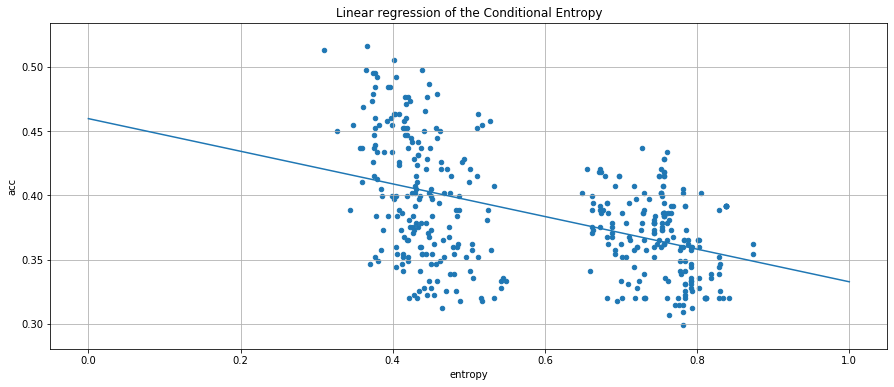

In [81]:
reg, coeff, intercept = regress(["entropy"])

x = np.linspace(0,1,100)
l = coeff*x + intercept

results.plot.scatter("entropy", "acc", figsize=(15,6), grid=True, title="Linear regression of the Conditional Entropy")
plt.plot(x,l)
err = mse(reg, ['entropy'])
print(f"MSE: {err}")

### Classification Metric

R2 Score: 0.16361935519758508
Coeffs: [-0.26760182]
Intercept: 0.5164750900416739
MSE: 0.001731986150621953


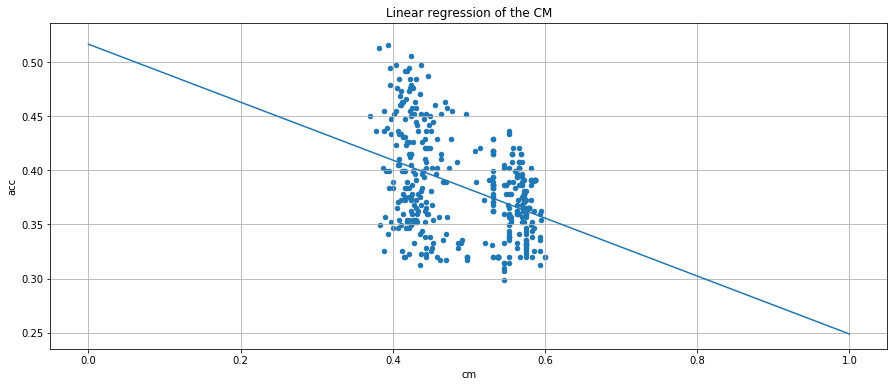

In [84]:
reg, coeff, intercept = regress(["cm"])

x = np.linspace(0,1,100)
l = coeff*x + intercept

results.plot.scatter("cm", "acc", figsize=(15,6), grid=True, title="Linear regression of the CM")
plt.plot(x,l)
err = mse(reg, ['cm'])
print(f"MSE: {err}")

### DM

R2 Score: 0.13887194053065177
Coeffs: [0.07438114]
Intercept: 0.33925493004999896
MSE: 0.001783233366507673


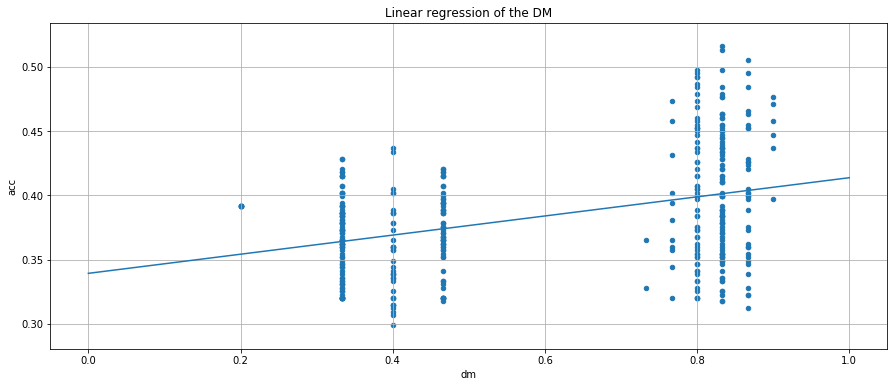

In [85]:
reg, coeff, intercept = regress(["dm"])

x = np.linspace(0,1,100)
l = coeff*x + intercept

results.plot.scatter("dm", "acc", figsize=(15,6), grid=True, title="Linear regression of the DM")
plt.plot(x,l)
err = mse(reg, ['dm'])
print(f"MSE: {err}")

### CM and DM

In [133]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3d(coeffs, intercept, metrics):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    
    X = np.arange(0, 1, 0.01)
    Y = np.arange(0, 1, 0.01)
    X, Y = np.meshgrid(X, Y)
    
    Z = coeff[0]*X + coeff[1]*Y + intercept
    surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_xlabel(metrics[0])
    ax.set_ylabel(metrics[1])
    ax.set_zlabel("acc")
    fig.colorbar(surf, shrink=0.5, aspect=5)

R2 Score: 0.16406166080415363
Coeffs: [-0.30563694 -0.0122191 ]
Intercept: 0.5426592099893928
MSE: 0.001731070219353481


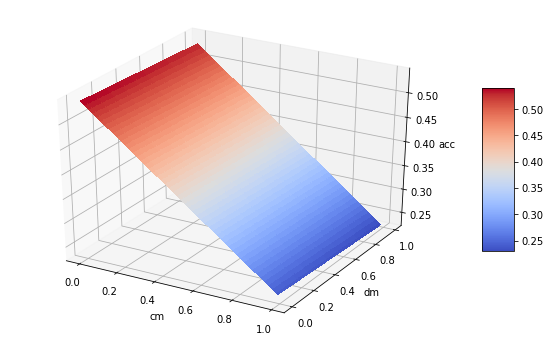

In [132]:
reg, coeff, intercept = regress(["cm","dm"])
plot_3d(coeff, intercept, ["cm","dm"])

err = mse(reg, ['cm',"dm"])
print(f"MSE: {err}")

See that DM isn't worth much...

### CM and Entropy

R2 Score: 0.2377217699951678
Coeffs: [ 0.38792837 -0.28218907]
Intercept: 0.36009359682064535
MSE: 0.0015785340628020866


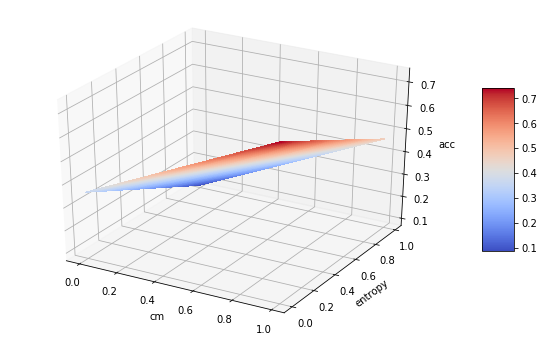

In [134]:
reg, coeff, intercept = regress(["cm","entropy"])
plot_3d(coeff, intercept, ["cm","entropy"])

err = mse(reg, ['cm',"entropy"])
print(f"MSE: {err}")

### DM and Entropy

R2 Score: 0.30806552662930486
Coeffs: [-0.25012815 -0.46053611]
Intercept: 0.8089409098378881
MSE: 0.0014328654452531613


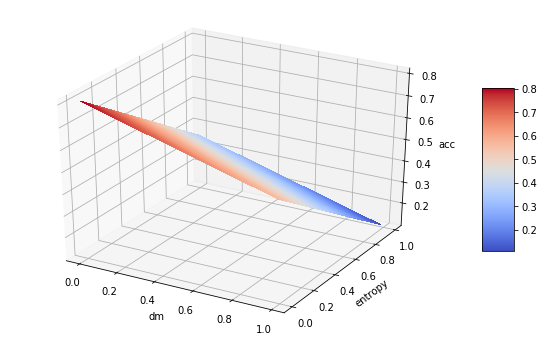

In [135]:
reg, coeff, intercept = regress(["dm","entropy"])

plot_3d(coeff, intercept, ["dm","entropy"])
err = mse(reg, ['dm',"entropy"])
print(f"MSE: {err}")

### DM CM and Entropy

In [136]:
reg, coeff, intercept = regress(["cm", "dm","entropy"])

err = mse(reg, ["cm", 'dm',"entropy"])
print(f"MSE: {err}")

R2 Score: 0.3263462316925557
Coeffs: [ 0.33840299 -0.24279857 -0.58621091]
Intercept: 0.7119022105894117
MSE: 0.0013950095620618008
